## Coding Exercise #0403

### 1. Compare clustering algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Generate simulated data and visualize:

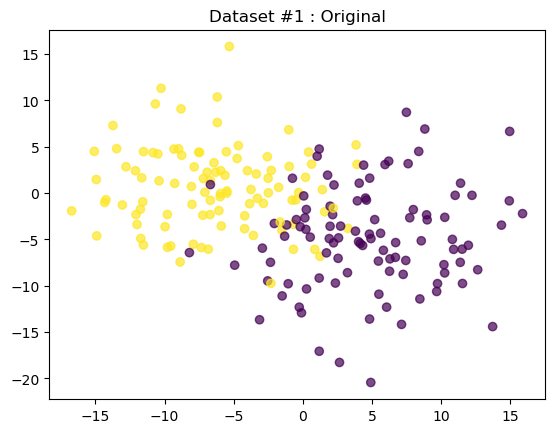

In [3]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

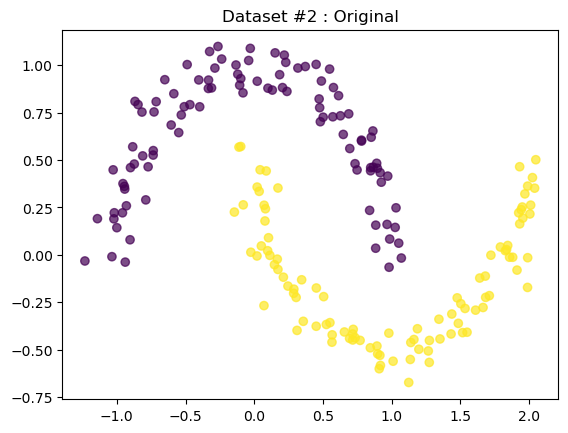

In [5]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

C:\Users\34665\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\34665\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


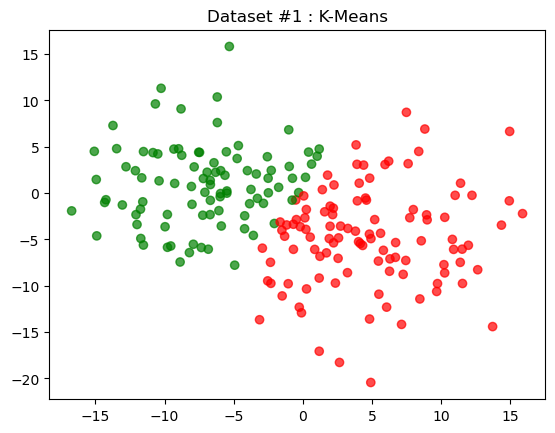

In [7]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )    
plt.title('Dataset #1 : K-Means')
plt.show()

C:\Users\34665\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\34665\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


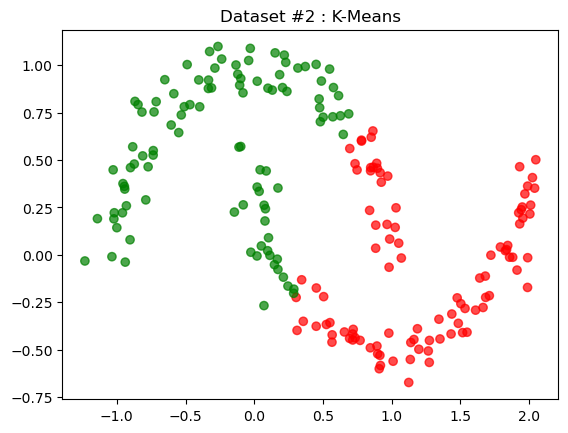

In [9]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X2)                                                 # Unsupervised learning => Only X1.    
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.title('Dataset #2 : K-Means')
plt.show()

#### 1.3. Apply agglomerative clustering and visualize:

In [11]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='deprecated', metric=None, memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      The metric to use when calculating distance between instances in a
 |      feature array. If metric is a string or callable, it must be one of
 |      the options allowed by :func:`sklearn

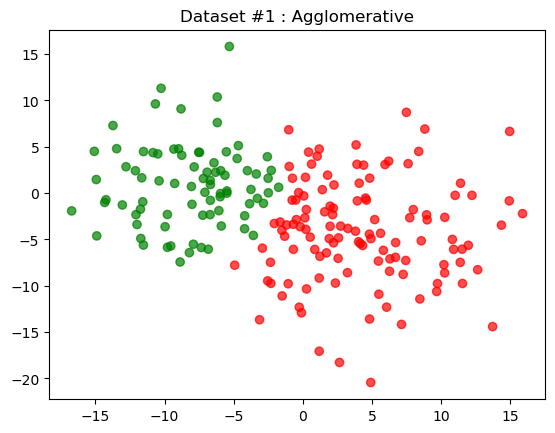

In [15]:
# Q: Apply and fit AgglomerativeClustering to Dataset #1 (two clusters).
# AgglomerativeClustering(n_clusters=2, linkage="..")
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

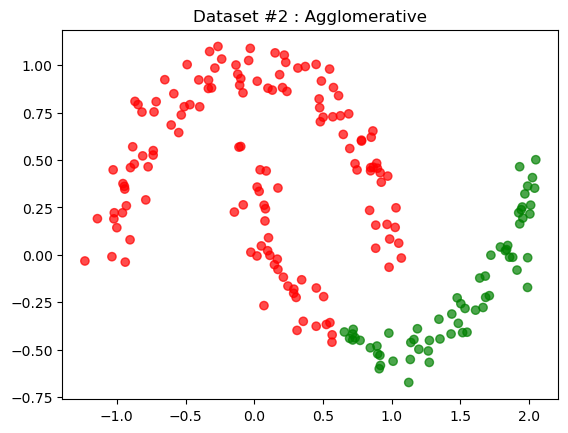

In [17]:
# Q: Apply and fit AgglomerativeClustering to Dataset #2 (two clusters).
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X2)
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

#### 1.4. Apply hierarchical clustering and visualize: 

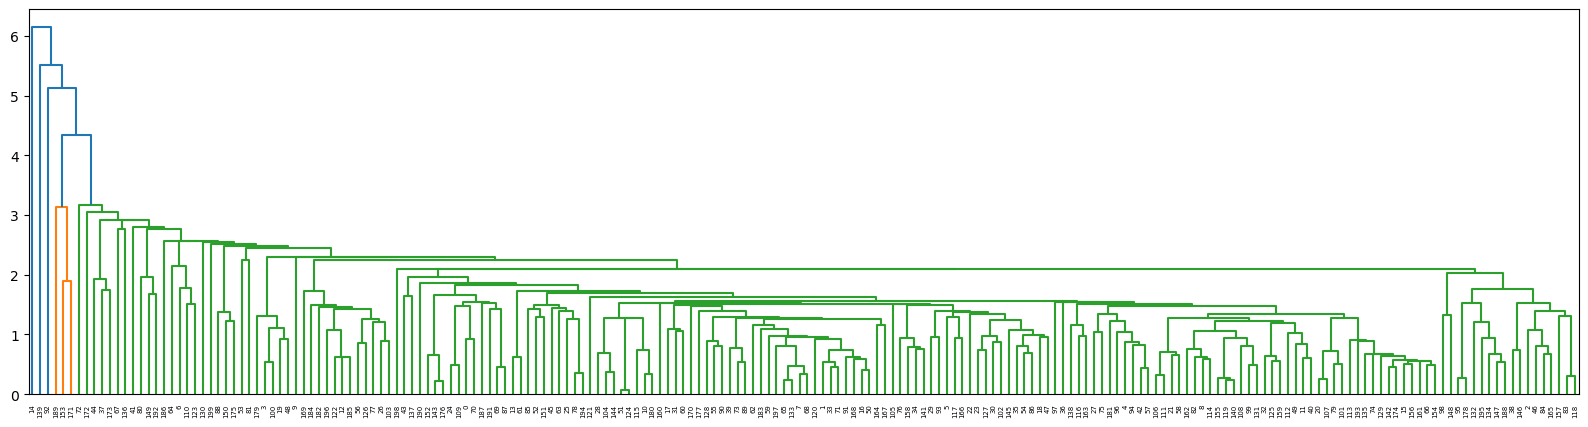

In [39]:
# Q: Show the dendrogram for Dataset #1 using single linkage (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
myLinkage = linkage(X1)
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [47]:
# Q: Cut the dendrogram at the X height (distance) to obtain 2 clusters
labels = fcluster(myLinkage, t=3, criterion='distance')
pd.Series(labels).value_counts()

3    192
1      2
8      1
5      1
6      1
7      1
4      1
2      1
Name: count, dtype: int64

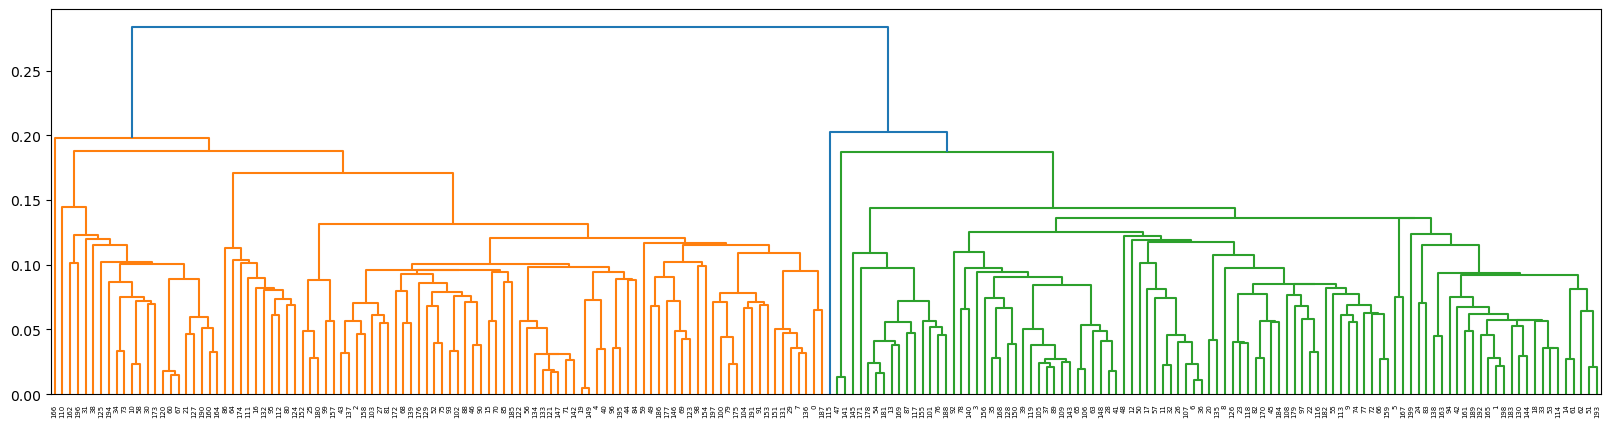

In [31]:
# Q: Show the dendrogram for Dataset #2 using single linkage (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
myLinkage = linkage(X2)
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [45]:
# Q: Cut the dendrogram at the X height (distance) to obtain 2 clusters
labels = fcluster(myLinkage, 33, criterion="distance")
pd.Series(labels).value_counts()

1    200
Name: count, dtype: int64

#### 1.5. Apply DBSCAN and visualize: 

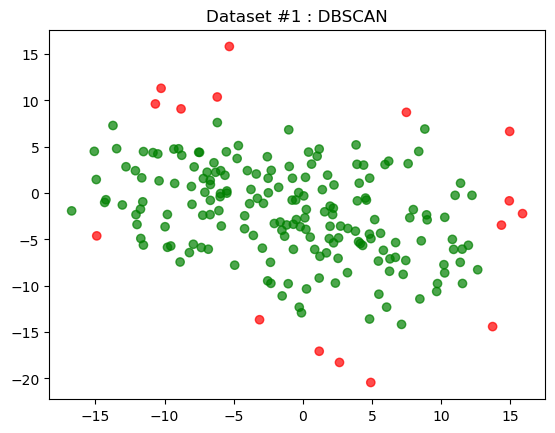

In [35]:
# Apply and fit DBSCAN (eps = 3 and min_samples = 5) to Dataset #1 (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X1)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

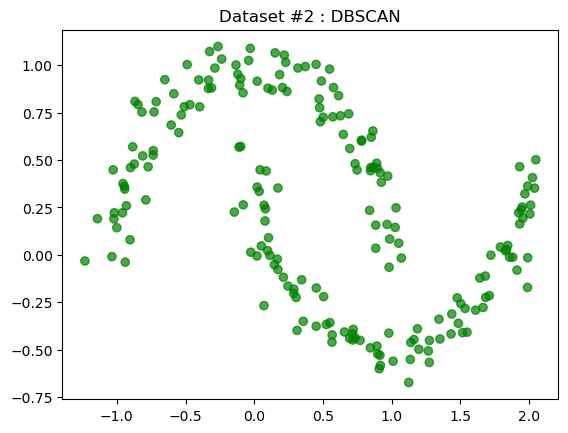

In [33]:
# Apply and fit DBSCAN (eps = 3 and min_samples = 5) to Dataset #2 (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

Q: Discuss the result of the different clustering algorithms.